In [10]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from neural.containers import Sequential
from neural.losses import CE, MSE
from neural.layers import TanH, Sigmoid, Dense, RELU, Softmax
from neural.utils.preprocessing import Flatten, OneHotEncoder
from neural.metrics import sparse_accuracy
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
def plot_images(images, pred, actual, img_per_row=5):
    rows = len(images) // img_per_row
    fig, axes = plt.subplots(rows, img_per_row, figsize=(15 ,5))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.grid(False)
        ax.axis(False)
        ax.set_title(f'Predicted: {pred[i]} | Actual: {actual[i]}')
    plt.tight_layout()
    plt.show()

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


# only take a few 
x_train = x_train[0:1000]
y_train = y_train[0:1000]

In [5]:
# make encoder
encoder = OneHotEncoder()
encoder.fit(y_train)
# make flatterner 
flat = Flatten(input_shape=(28, 28))

In [6]:
# modify inputs / labels
y_train_encoded = encoder.encode(y_train)
x_train_flat = flat.forward(x_train)
x_test_flat = flat.forward(x_test)

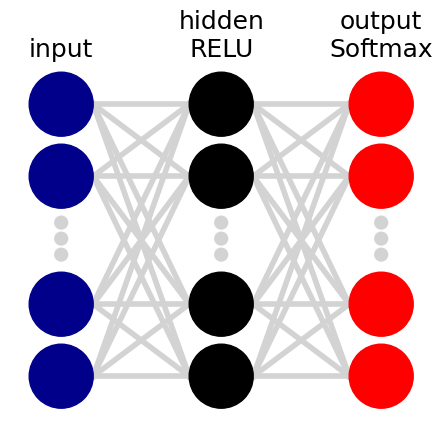

In [7]:
model = Sequential([
    Dense(28 * 28, 128),
    RELU(),
    Dense(128, 10),
    Softmax()
])

model.display_network()

In [8]:
hist_loss, hist_acc = model.fit(x_train_flat, y_train_encoded, 300, .01, CE())
plt.plot(hist_loss, label='loss')
plt.plot(hist_acc, label='accuracy')
plt.legend()
plt.show()

Epoch 0/300, Loss: 1.0710, Accuracy: 0.9393


KeyboardInterrupt: 

In [12]:
pred = np.argmax( model.predict(x_test_flat), axis=1)
sparse_accuracy(pred, y_test)

0.8821

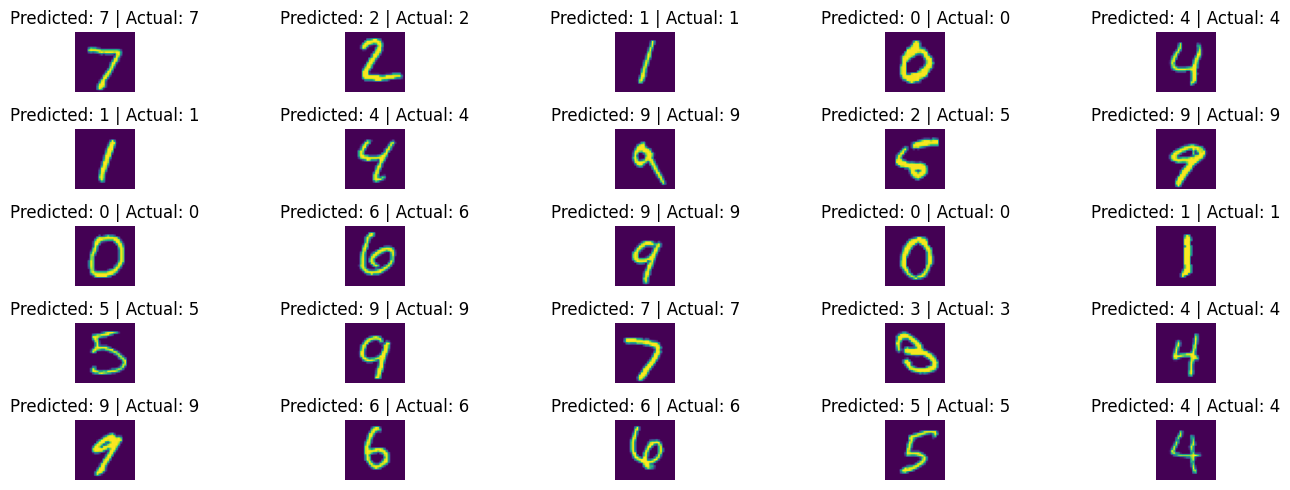

In [13]:
plot_images(x_test[:26], pred[:26], y_test[:26])

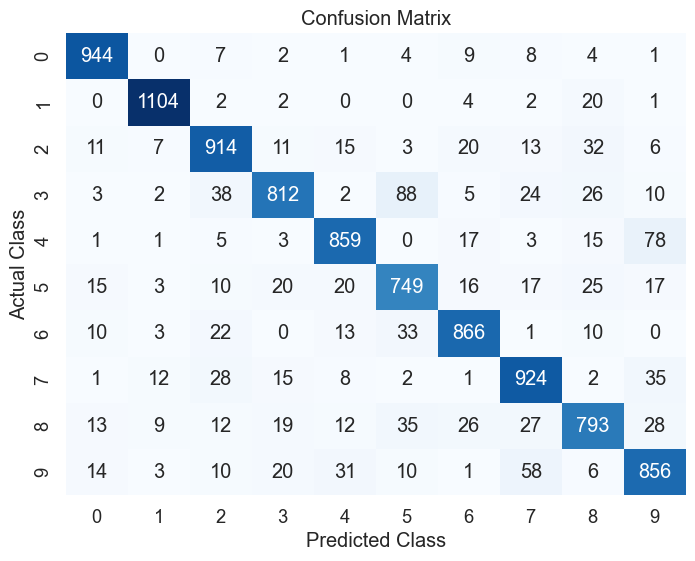

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


conf_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()